In [1]:
from z3 import *


Differential equations + Z3

We can differentiate expressiosn
We can integrate expressions


We can call Z3. get models



Differential equations are unfortunately unbounded loops. They're hard to unroll. I guess we could anyway and just say F-it.
Espcially if you combined it with an error estimate.
Any returned countermodel would be super suspicious.
Unsats are roughly as trustable as naive BMC unsats



diff(x) ->  (x_{n + 1} - x_n) / dt


hand it off to sympy


bnouncing ball

x,v = Real("x v")
dt = 0.1

dyn = And(prime(x) == If(x + v * dt <= 0, 0, x + v * dt),
prime(v) == If(x == 0, -v, v + g*dt))
Spec = x >= 0 & v <= v0
Init = And(x <= 1, v == 0)


What about fully eager dpll?

class MySolver(Solver)
    def add():
    def check():
    def 

What about differential equations as surfaces.

dx* ==    *dy


has to be linear, so could replace d with complete basis at compile time.


PC is the explici time parameter.
t

dt*x == dx 

dx == -x*dt

dx2 = -(x + dx)*dt2


prime(t) == t + dt
prime(x) = x + dx
dx == -x * dt






integral as special symbol
integ(x) \sub 


 [ Interval() for i in range(n)]
integ(tube) = [ dt*  ]


How do we 

what about the "subgradient". We could consider the derivative to be kind of a cone.



In [ ]:
class Interval():
    def __init__(self,l,r):
        self.l = l
        self.r = r
    def __add__(self,rhs):
        if type(rhs) == Interval:
            return Interval(self.l + rhs.l, self.r + rhs.r)
    def __sub__(self, rhs):
        return Interval(self.l)
    def __mul__(self,rhs):
        combos = [self.l * rhs.l, self.l * rhs.r, self.r * rhs.l, self.r*rhs.r]
        return Interval( Min(*combos), Max(*combos))
    def fresh():
        l = FreshReal()
        r = FreshReal()
        return Interval(l,r)
            
    def valid(self): # It is problematic that I have to rememeber to use this. A way around it?
        return self.l <= self.r
    def __le__(self,rhs): # Or( self.r < self.l ) (ie is bottom)
        return And(rhs.l <= self.l, self.r <= rhs.r )
    def __lt__(self,rhs):
        return And(rhs.l < self.l, self.r < rhs.r )
    def forall( eq ):
        i = Interval.fresh()
        return ForAll([i.l,i.r] , Implies(i.valid(), eq(i) ))
    def elem(self,item):
        return And(self.l <= item, item <= self.r) 
    def join(self,rhs):
        return Interval(Min(self.l, rhs.l), Max(self.r, rhs.r))
    def meet(self,rhs):
        return Interval(Max(self.l, rhs.l), Min(self.r, rhs.r))
    def width(self):
        return self.r - self.l
    def mid(self):
        return (self.r + self.l)/2
    def bisect(self):
        return Interval(self.l, self.mid()), Interval(self.mid(), self.r)
    def point(x):
        return Interval(x,x)
    def recip(self): #assume 0 is not in 
        return Interval(1/self.r, 1/self.l)
    def __truediv__(self,rhs):
        return self * rhs.recip()
    def __repr__(self):
        return f"[{self.l} , {self.r}]"
    def pos(self):
        return And(self.l > 0, self.r > 0)
    def neg(self):
        return And(self.l < 0, self.r < 0)
    def non_zero(self):
        return Or(self.pos(), self.neg())

def FreshInterval(prefix=None):
    return Interval.fresh(prefix)

class Tube:
    intervals
    ts # one more than intervals. Intervals are edges, ts are vertices
    def __add__()
    
    def __call__(self):
        i = find in ts:
            return self.intervals[i]
    def map_(self,f):
    def contains(self):
        And(intervals)
    def integrate(self):
        new_interval = []
        acc = 0
        for i in intervals:
            acc = acc + dt * i
            new_interval.push( acc )
        
        
        

    


In [218]:
!pip3 install dreal


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.2 MB 1.4 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [219]:
from dreal import *

ImportError: libibex.so: cannot open shared object file: No such file or directory

In [ ]:
def sin(x):
    return x - x**3 / 6 + x**5 / 125

def sin(x):
    return  z,  z <= x - x**3 / 6 + x**5 / 125 + delta
# counterexample refinement



https://arxiv.org/pdf/2003.05633.pdf - tried to compete with nlsat. didn't come out favorably

NLSAT is a seperate solver inside z3 that may be automatically invoked.
I guess it's actually pretty good
https://theory.stanford.edu/~nikolaj/programmingz3.html#sec-nlsat

Yea, I actually did try z3 for kissing number
didn't work for unsat in 2d


In [2]:
s = SolverFor("QF_NRA")
x, y = Reals('x y')
s.add(x**3 + x*y + 1 == 0, x*y > 1, x**2 < 1.1)
print(s.check())

unsat


In [5]:
# 1d micro kissing
s = SolverFor("QF_NRA")
x, y, z = Reals('x y z')
s.add(x**2 == 1, y**2 == 1, z**2 == 1, (z - y)**2 >= 1, (x - z)**2 >= 1, (y - x)**2 >= 1)
print(s.check())

unsat


In [7]:
# micro kissing
s = SolverFor("QF_NRA")
x, y = Reals('x y')
s.add(x**2 == 1, y**2 == 1, (y - x)**2 >= 1)
print(s.check())
s.model()

sat


[y = 1, x = -1]

In [ ]:

#http://ai.stanford.edu/~chuongdo/satpage/
from z3 import *
import numpy as np

N = 5 
T = N*N-1
x = np.array([ [ [ Bool(f"x_{i}_{j}_{t}")  for t in range(T)]   for j in range(N) ] for i in range(N)])

x[:,:,0] == True # initial conditin
x[:,:,-1] == False # final condition

a = np.array([ [[ [ Bool(f"a_{i}_{j}_{t}_{d}")  for t in range(T-1)] for d in ["U","D","L","R"]]  for j in range(N) ] for i in range(N)])
UP = 0
DOWN = 1
LEFT = 2
RIGHT = 3
a[0,:,:,LEFT] == False
a[-1,:,:,RIGHT] == False
a[:,0,:,DOWN] == False
a[:,-1,:,UP] == False

[  exactly_one(a[:,:,t,:])  for  t in range(T-1)]

Implies( a[i,j,t,LEFT] ,  x[i,j,t] & x[i-1,j,t] & !x[i-2,j,t] & !x[i,j,t+1] & !x[i-1,j,t+1] & x[i-2,j,t+1] &  everything_else_unchanged   )
Implies( a[i,j,t,RIGHT] ,  x[i,j,t] & x[i-1,j,t] & !x[i-2,j,t] & !x[i,j,t+1] & !x[i-1,j,t+1] & x[i-2,j,t+1] &  everything_else_unchanged   )
Implies( a[i,j,t,UP] ,  x[i,j,t] & x[i-1,j,t] & !x[i-2,j,t] & !x[i,j,t+1] & !x[i-1,j,t+1] & x[i-2,j,t+1] &  everything_else_unchanged   )



In [ ]:
from z3 import *
import numpy as np

d = 3 # dimensions
n = 7 # number oif spheres

x = np.array([ [ Real("x_%d_%d" % (i,j))     for j in range(d) ] for i in range(n)])
print(x)

c = []
ds = np.sum(x**2, axis=1)
c += [ d2 == 1 for d2 in ds] # centers at distance 2 from origin


ds = np.sum( (x.reshape((-1,1,d)) - x.reshape((1,-1,d)))**2, axis = 2)

c += [ ds[i,j]  >= 1  for i in range(n) for j in range(i)] # spheres greater than dist 2 apart
c += [x[-1,0] == 1] # symmettry breaking
c += [x[-1,1] == 0]
c += [x[-1,2] == 0]
c += [x[i,0] <= x[i+1,0] for i in range(n-1)  ] # symmettry breaking
c += [Implies(x[i,0] == x[i+1,0],  x[i,1] <= x[i+1,1] ) for i in range(n-1)  ] # symmettry breaking
for x in c:
   print(x)
    

#print(c)
#print(solve(c))
s = SolverFor("QF_NRA")
s.add(c)
print(s.check())
#print(s.model())

[[x_0_0 x_0_1 x_0_2]
 [x_1_0 x_1_1 x_1_2]
 [x_2_0 x_2_1 x_2_2]
 [x_3_0 x_3_1 x_3_2]
 [x_4_0 x_4_1 x_4_2]
 [x_5_0 x_5_1 x_5_2]
 [x_6_0 x_6_1 x_6_2]]
x_0_0**2 + x_0_1**2 + x_0_2**2 == 1
x_1_0**2 + x_1_1**2 + x_1_2**2 == 1
x_2_0**2 + x_2_1**2 + x_2_2**2 == 1
x_3_0**2 + x_3_1**2 + x_3_2**2 == 1
x_4_0**2 + x_4_1**2 + x_4_2**2 == 1
x_5_0**2 + x_5_1**2 + x_5_2**2 == 1
x_6_0**2 + x_6_1**2 + x_6_2**2 == 1
(x_1_0 - x_0_0)**2 + (x_1_1 - x_0_1)**2 + (x_1_2 - x_0_2)**2 >=
1
(x_2_0 - x_0_0)**2 + (x_2_1 - x_0_1)**2 + (x_2_2 - x_0_2)**2 >=
1
(x_2_0 - x_1_0)**2 + (x_2_1 - x_1_1)**2 + (x_2_2 - x_1_2)**2 >=
1
(x_3_0 - x_0_0)**2 + (x_3_1 - x_0_1)**2 + (x_3_2 - x_0_2)**2 >=
1
(x_3_0 - x_1_0)**2 + (x_3_1 - x_1_1)**2 + (x_3_2 - x_1_2)**2 >=
1
(x_3_0 - x_2_0)**2 + (x_3_1 - x_2_1)**2 + (x_3_2 - x_2_2)**2 >=
1
(x_4_0 - x_0_0)**2 + (x_4_1 - x_0_1)**2 + (x_4_2 - x_0_2)**2 >=
1
(x_4_0 - x_1_0)**2 + (x_4_1 - x_1_1)**2 + (x_4_2 - x_1_2)**2 >=
1
(x_4_0 - x_2_0)**2 + (x_4_1 - x_2_1)**2 + (x_4_2 - x_2_2)**2 >=
1
(x_4_0

https://github.com/egraphs-good/egg/blob/master/tests/math.rs

This implies that I could use z3 to perform differentiation?

Or any rewrite rule system? Maybe not.
   
Maybe I'm hurting myself by using realsa
   

In [25]:
x = Real("x")
y = Real("y")
z = Real("z")

R = RealSort()

sin = Function("sin", R,R)
cos = Function("cos", R,R)
diff = Function("diff", R,R,R) # Wow this does not sit right.

axioms = [
    ForAll([y, z], diff( y * z , x) == diff(y,x) * z + y * diff(z,x) , patterns=[ diff( y * z , x)]),
    ForAll([y, z], diff( y + z , x) == diff(y,x) * z + y * diff(z,x),  patterns=[ diff( y + z , x)]),
    diff( x * x , x) == 2 * x,
    diff( x , x  ) == 1,
    
]


theorem = Not( diff(x*x*x, x) == 3 * x * x )

s = Solver()
s.add(axioms)
s.add(theorem)
print(s)
print(s.check())
print(s.model())

[ForAll([y, z], diff(y*z, x) == diff(y, x)*z + y*diff(z, x)),
 ForAll([y, z],
        diff(y + z, x) == diff(y, x)*z + y*diff(z, x)),
 diff(x*x, x) == 2*x,
 diff(x, x) == 1,
 Not(diff(x*x*x, x) == 3*x*x)]
unknown


Z3Exception: model is not available

In [ ]:
S = DeclareSort("Foo")

x,y,z,w = Consts("x y z w", S)

I suppose when z3 returns a model, the model is a serialization of the egraph? 

In [17]:
S = DeclareSort("Foo")

x,y,z,w = Consts("x y z w", S)

assoc = Function("assoc", S,S,S) # Wow this does not sit right.


axioms = [
   # ForAll([x, y, z] ,  assoc(x,assoc(y,z)) == assoc(assoc(x,y),z), patterns=[assoc(x,assoc(y,z))] )
     ForAll([x, y, z] ,  assoc(x,assoc(y,z)) == assoc(assoc(x,y),z), patterns=[assoc(x,assoc(y,z))] )
    
]


theorem = Not(assoc(w,assoc(x,assoc(y,z))) == assoc(assoc(assoc(w,x),y),z) )

s = Solver()
s.add(axioms)
s.add(theorem)
print(s)
print(s.check())
print(s.sexpr())


[ForAll([x, y, z],
        assoc(x, assoc(y, z)) == assoc(assoc(x, y), z)),
 assoc(w, assoc(x, assoc(y, z))) ==
 assoc(assoc(assoc(w, x), y), z)]
unknown
(declare-sort Foo 0)
(declare-fun assoc (Foo Foo) Foo)
(declare-fun z () Foo)
(declare-fun y () Foo)
(declare-fun x () Foo)
(declare-fun w () Foo)
(assert (forall ((x Foo) (y Foo) (z Foo))
  (! (= (assoc x (assoc y z)) (assoc (assoc x y) z))
     :pattern ((assoc x (assoc y z))))))
(assert (= (assoc w (assoc x (assoc y z))) (assoc (assoc (assoc w x) y) z)))



In [29]:
S = DeclareSort("Foo")

x,y,z,w = Consts("x y z w", S)

assoc = Function("assoc", S,S,S) # Wow this does not sit right.

fred = Function("fred", S,BoolSort()) # Wow this does not sit right.

axioms = [
   # ForAll([x, y, z] ,  assoc(x,assoc(y,z)) == assoc(assoc(x,y),z), patterns=[assoc(x,assoc(y,z))] )
     ForAll([x, y, z] ,  assoc(x,assoc(y,z)) == assoc(assoc(x,y),z), patterns=[assoc(x,assoc(y,z))] )
    
]


theorem = fred(assoc(w,assoc(x,assoc(y,z))))

s = Solver()
s.add(axioms)
s.add(theorem)
print(s)
print(s.check())
print(s.sexpr())
print(s.model())

[ForAll([x, y, z],
        assoc(x, assoc(y, z)) == assoc(assoc(x, y), z)),
 fred(assoc(w, assoc(x, assoc(y, z))))]
unknown
(declare-sort Foo 0)
(declare-fun assoc (Foo Foo) Foo)
(declare-fun fred (Foo) Bool)
(declare-fun z () Foo)
(declare-fun y () Foo)
(declare-fun x () Foo)
(declare-fun w () Foo)
(assert (forall ((x Foo) (y Foo) (z Foo))
  (! (= (assoc x (assoc y z)) (assoc (assoc x y) z))
     :pattern ((assoc x (assoc y z))))))
(assert (fred (assoc w (assoc x (assoc y z)))))



Z3Exception: model is not available

In [19]:
A    = DeclareSort('A')
x, y = Consts('x y', A)
f    = Function('f', A, A)

s    = Solver()
s.add(f(f(x)) == x, f(x) == y, x != y)

print(s.check())
m = s.model()
print(m)
print("interpretation assigned to A:")
print(m[A])

sat
[x = A!val!0,
 y = A!val!1,
 f = [A!val!1 -> A!val!0, else -> A!val!1]]
interpretation assigned to A:
[A!val!1, A!val!0]


In [7]:
from z3 import *
set_param(proof=True)
A    = DeclareSort('A')
x, y,z, q, r, w= Consts('x y z q r w', A)
f    = Function('plus', A, A,  A)


s    = Solver()
s.set(unsat_core=True)
#s.set(proof=True)
#s.assert_and_track(ForAll([x,y,z], f(x,f(y,z)) == f(x,f(y,z))), "foo")
s.add(ForAll([x,y,z], f(x,f(y,z)) == f(x,f(y,z))))
s.add(ForAll([x,y], f(x,y) == f(y,z)))
s.add( Not(f(q,f(r,w)) == f(w,(f(r,q)))  ))
#s.assert_and_track( Not(f(x,f(y,z)) == f(z,(f(y,x)))  ), "biz")
print(s.check())
#s.unsat_core()
dir(s.proof())

unsat


['__bool__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_repr_html_',
 'arg',
 'as_ast',
 'ast',
 'children',
 'ctx',
 'ctx_ref',
 'decl',
 'eq',
 'get_id',
 'hash',
 'num_args',
 'params',
 'sexpr',
 'sort',
 'sort_kind',
 'translate',
 'use_pp']

In [32]:
s.proof().children()[1].children()[5].children()[0].children()[1].children()

[mp~(asserted(ForAll([x, y], plus(x, y) == plus(y, z))),
     nnf-pos(proof-bind(Lambda([x, y],
                               refl(~(plus(x, y) ==
                                      plus(y, z),
                                      plus(x, y) ==
                                      plus(y, z))))),
             ~(ForAll([x, y], plus(x, y) == plus(y, z)),
               ForAll([x, y], plus(x, y) == plus(y, z)))),
     ForAll([x, y], plus(x, y) == plus(y, z))),
 quant-intro(proof-bind(Lambda([x, y],
                               refl((plus(x, y) == plus(y, z)) ==
                                    (plus(x, y) == plus(y, z))))),
             (ForAll([x, y], plus(x, y) == plus(y, z))) ==
             (ForAll([x, y], plus(x, y) == plus(y, z)))),
 ForAll([x, y], plus(x, y) == plus(y, z))]

In [20]:
A    = DeclareSort('A')
x, y = Consts('x y', A)
f    = Function('f', A, A)

s    = Solver()
s.add(f(f(f(x))) == x, f(f(f(f(f(x))))) == x)

print(s.check())
m = s.model()
print(m)
print("interpretation assigned to A:")
print(m[A])

sat
[x = A!val!0, f = [else -> A!val!0]]
interpretation assigned to A:
[A!val!0]


Encoding homotopy equiavlanece into z3. no go? I feel like I attempted this somewhere

In [39]:
# This is take the gcd of sorts
# the gcd is the number of values in the model.

def apply(f,n,x):
    if n == 0:
        return x
    else:
        return apply(f,n-1, f(x))

A    = DeclareSort('A')
x, y = Consts('x y', A)
f    = Function('f', A, A)

s    = Solver()
s.add(apply(f,15,x) == x, apply(f,10,x) == x, apply(f,5,x) == x)

print(s.check())
m = s.model()
print(m)
print("interpretation assigned to A:")
print(m[A])

sat
[x = A!val!0,
 f = [A!val!1 -> A!val!2,
      A!val!2 -> A!val!3,
      A!val!3 -> A!val!4,
      A!val!4 -> A!val!0,
      else -> A!val!1]]
interpretation assigned to A:
[A!val!4, A!val!1, A!val!3, A!val!0, A!val!2]


In [76]:
class_equiv = {}
for v in m[A]:
    class_equiv[v] = set()
for d in m.decls():
    e = m[d]
    if isinstance(e,ExprRef): # simple value
        class_equiv[e].add(d)
    elif isinstance(e, FuncInterp): # function
        l = e.as_list()
        for z in l[:-1]:
            class_equiv[z[-1]].add( (d, tuple(z[:-1])))
        #for v in m[A]:
        #    class_equiv[ m[e[v]] ].add(e[v])
        

class_equiv    
    

{A!val!4: {(f, (A!val!3,))},
 A!val!1: set(),
 A!val!3: {(f, (A!val!2,))},
 A!val!0: {(f, (A!val!4,)), x},
 A!val!2: {(f, (A!val!1,))}}

In [108]:
def merge_bindings(d1,d2):
    freshd = copy(d1)
    for (k,v) in d2.items():
        if k in freshd:
            if freshd[k] != v:
                return None
        else:
            freshd[k] = v
    return freshd
def merge_product(d1s, d2s):
    for d1 in d1s:
        for d2 in d2s:
            md = merge(d1,d2)
            if md != None:
                yield md
from functools import reduce

def match(m, class_id, patvars, pat): # matching against pattern against class_id in model m
    if pat.num_args() > 0: #function
        head = pat.decl()
        children = pat.children()
        
        patinterp = m[head].as_list()
        for l in patinterp[:-1]:
            result_id = l[-1]
            arg_ids = l[:-1]
            if result_id == class_id: # result of function matches 
                yield from reduce( merge_product, [ match(m,class_id, patvars, pat) for class_id, pat in zip(l[:-1] ,  pat.children())])
        if patinterp[-1] == class_id: # else case matches
            pass                   
    elif pat in patvars: # a pattern variable
                patdict = {}
                patdict[pat] = class_id
                yield patdict # success
    else: # a literal. Not a pattern variable
        if m[pat] == class_id:
            yield patdict # success
        else:
            return # failure
                            
def match_top(m,patvars, pat):
    for class_id in m[pat.sort()]:
        yield from match(m, class_id, patvars, pat)


# i should write a stack overlofw asking if oner can ge thgis stuff
# I should definitely define pattern macthing functionally, with recursion
                            
def complete_func_def(m, f):
    # remove the shitty else case.
def get_ground(m, eclass):
    # get a ground term that is a member of eclass.
    # We'll want this to assert to z3

In [213]:
from z3 import *

# https://www.philipzucker.com/programming-and-interactive-proving-with-z3py/
# useful non default operator definitions for z3 bools
BoolRef.__and__ = lambda self, rhs: And(self,rhs)
BoolRef.__or__ = lambda self, rhs: Or(self,rhs)
BoolRef.__xor__ = lambda self, rhs: Xor(self,rhs)
BoolRef.__invert__ = lambda self: Not(self)
BoolRef.__rshift__ = lambda self, rhs: Implies(self,rhs)

# https://stackoverflow.com/questions/14080398/z3py-how-to-get-the-list-of-variables-from-a-formula
def get_vars(f):
    r = set()
    def collect(f):
      if is_const(f): 
          if f.decl().kind() == Z3_OP_UNINTERPRETED:
              r.add(f)
      else:
          for c in f.children():
              collect(c)
    collect(f)
    return r


#next = Function("next", IntSort(),IntSort())
x,y,z = Ints("x y z")
def nxt(x):
    s = x.sort()
    return Function("prime", s, s)(x)

def unchanged(*args):
    return And([prime(x) == x for x in args])
 
#https://theory.stanford.edu/~nikolaj/programmingz3.html#sec-bounded-model-checking
def always(p,n=20):
    orig_vs = get_vars(p)
    nextvs = orig_vs
    t = True
    for i in range(1,n):
        vs = nextvs
        nextvs =  [ Const( f"{str(v)}_{i}", v.sort()) for v in orig_vs  ] # [  FreshConst(  v.sort(), prefix=str(v)_1 ) for v in orig_vs  ]
        p1 = substitute(p, [ (prime(v), nextv) for v, nextv in zip(orig_vs,nextvs)  ]) 
        p2 = substitute(p1, [ (orig_v, v) for orig_v, v in zip(orig_vs,vs)  ])
        t = And(t,p2)
    return t

# x_fun = Function(str(x), IntSort(), x.sort())
# diff(x) 

def stutter(p, vars=None):
    if vars == None:
        vars = get_vars(p)
    return Or(p, unchanged(*vars))

e = prime(x) == 2*x
always(e,3)

hr = Int("hr")
HCini = And(0 <= hr, hr <= 12)
HCnxt = prime(hr) == If(hr != 13, hr + 1, 1)
HC = And(HCini, always(HCnxt, 20)) 
#prove(Implies(HC,  always(HCini,20) ) )

# solve gives you an arbitrary trace
#solve(HC)

HCnxt2 = prime(hr) == hr % 12 + 1
HC2 = HCini & always(HCnxt2,20)

# completeness: check if allpossible next states have been visited

data = set([8,5,8,3,1])
val = Int("val")
rdy, ack = Bools("rdy ack")
def elem(x,S):
    return Or([x == s for s in S])
elem(val,data)

TypeInvariant = And(
    elem(val,data),
    elem(rdy, [True, False]),
    elem(ack, [True, False])
    )

Init = And(
    elem(val,data),
    elem(rdy, [True,False ]),
    ack == rdy
    )

Send = And(
        rdy == ack,
        elem(prime(val), data),
        prime(rdy) == Not(rdy),
        unchanged(ack)
)

Rcv = And(
   rdy != ack
  , prime(ack) == Not(ack)
  , unchanged(val, rdy)
)

Next = Or(Send,Rcv)
Spec = Init & always( stutter(Next)  )

prove(Implies(Spec, always(TypeInvariant)))


# record
val = Int("val")
rdy, ack = Bools("rdy ack")
chan = {val : val, rdy : rdy, ack : ack}

Chan = Datatype("Chan")
ChanCon = Chan.declare("constr", ("val", IntSort()) , ("rdy", BoolSort()),  ("ack", BoolSort()) )
Chan = Chan.create()
record = Chan.constr(val,rdy,ack)
chan = Const("chan", Chan)



simplify(Chan.ack(record))



def Send(d):
    return And( Chan.rdy(chan) == Chan.ack(chan),  prime(chan) == Chan.constr( d ,  Not(Chan.rdy(chan))   ,  Chan.ack(chan) ) )

d = Int("d")
Exists([d],  And(elem(d,data), Send(d) ))




proved


Exists(d,
       And(Or(d == 8, d == 1, d == 3, d == 5),
           And(rdy(chan) == ack(chan),
               prime(chan) ==
               constr(d, Not(rdy(chan)), ack(chan)))))

In [ ]:
def square(x):
    return x*x

square = Function("square", IntSort(),IntSort())
x = Int("x")
square_axiom = ForAll([x], square(x) == x * x)


In [217]:
hr = Int("hr")
HCini = And(0 <= hr, hr <= 12)
HCnxt = nxt(hr) == If(hr != 12, hr + 1, 1)
HC = And(HCini, always(HCnxt)) 
prove(Implies(HC,  always(HCini)))

# solve gives you an arbitrary trace
#solve(HC)

#HCnxt2 = prime(hr) == hr % 12 + 1
#HC2 = HCini & always(HCnxt2,20)

proved


In [209]:
x, xnxt = Ints("x x'")
xnxt

x'

In [190]:
small, big = Ints("small big")

TypeOk = And(
   elem(small, range(4)),
   elem(big, range(6))
)
Init = And(
   big == 0,
   small == 0
)

FillSmall = And(prime(small) == 3, unchanged(big))
FillBig = And(prime(big) == 5, unchanged(small))
Goal = big != 4
SmallToBig = If(big + small <= 5,   
                 And( nxt(big) == big + small, nxt(small) == 0 ) , 
                 And(nxt(small) == small - (5 - big), nxt(big) == 5)
               )

BigToSmall = If( big + small <= 3,
                 And( nxt(small) == big + small, nxt(big) == 0),
                 And( nxt(small) == 3, nxt(big) == big - (3 - small) )
                )

EmptyBig = And(nxt(big) == 0,  unchanged(small)) 
EmptySmall = And(nxt(small) == 0,  unchanged(big)) 
Next = Or(FillSmall, FillBig, EmptySmall, EmptyBig, SmallToBig, BigToSmall)

Spec = Init & always(Next, n=8)
prove( Implies(Spec  , always(Goal, n = 8)))
s = Solver()
s.add(Not(Implies(Spec  , always(Goal, n = 8))))
s.check()
m = s.model()
[f"{d.name()} = {m[d]}" for d in sorted(m.decls(), key=lambda d: d.name())]



counterexample
[small_2 = 3,
 small_3 = 0,
 big_6 = 4,
 small_1 = 0,
 big_5 = 5,
 big_3 = 2,
 big_2 = 2,
 small_5 = 2,
 small_7 = 3,
 big_1 = 5,
 big_7 = 5,
 small_6 = 3,
 big_4 = 0,
 small_4 = 2,
 small = 0,
 big = 0]


['big = 0',
 'big_1 = 5',
 'big_2 = 2',
 'big_3 = 2',
 'big_4 = 0',
 'big_5 = 5',
 'big_6 = 4',
 'big_7 = 4',
 'small = 0',
 'small_1 = 0',
 'small_2 = 3',
 'small_3 = 0',
 'small_4 = 2',
 'small_5 = 2',
 'small_6 = 3',
 'small_7 = 0']

In [206]:
from enum import Enum, auto
class RMState(Enum):
     WORKING = auto()
     PREPARED = auto()
     COMMITTED = auto()
     ABORTED = auto()
RMState = Datatype("RMState")
RMState.declare("working")
RMState.declare("prepared")
RMState.declare("comitted")
RMState.declare("aborted")

RMState = RMState.create()
# resource manager
RM = ["anne", "hank"]

rmState = { rm : Const(f"rm_{rm}", RMState) for rm in RM }
#TCTypeOK = And( [ elem(state, RMState)  for state in rmState.values() ]  )
TCInit =  And([state == RMState.working  for state in rmState.values()] )

def Decide(rm):
    return True

def Prepare(rm):
    return And( prime(rmState[rm]) == RMState.prepared , 
                rmState[rm] == RMState.working,   
                *[unchanged(rmState[rm2]) for rm2 in RM if rm2 != rm]) 
TCNext = Or([Or(Prepare(rm), Decide(rm)) for rm in RM])

TCNext

Or(Or(And(prime(rm_anne) == prepared,
          rm_anne == working,
          And(prime(rm_hank) == rm_hank)),
      True),
   Or(And(prime(rm_hank) == prepared,
          rm_hank == working,
          And(prime(rm_anne) == rm_anne)),
      True))

In [195]:
isinstance(RMState,Enum)

KeyError: 0

In [75]:
def case(cases):
    
    if "other" in cases:
        acc = cases["other"]
        del cases["other"]
    else:
        acc = FreshConst(list(cases.values())[0].sort())
    for cond, result in cases.items():
        acc = If(cond, result, acc)
    return acc


case( { x == 6 : x, x < 2 : x + 7 })

#def move(p):
def move(p, vars=None):
    return Not(stutter,vars=vars)
    #if vars == None:
    #    vars = get_vars(p)
    #return And(p, Not(unchanged(*vars)))

# choose([x], ?) == ?
# enabled, compose

# weak fairness, strong fairness, leadsto, guarantees, temporal quantification

If(x < 2, x + 7, If(x == 6, x, c!2))

In [ ]:
def enabled(A):
    vs = get_vars(A)
    nxtvs =  [ FreshConst(  v.sort(), prefix=str(v) ) for v in vs  ] # [ Const( f"{str(v)}_{i}", v.sort()) for v in orig_vs  ] #
    p1 = substitute(A, [ (nxt(v), nextv) for v, nextv in zip(vs,nxtvs)  ]) 
    return Exists(nxtvs, p1)


Hmmmm. Could I do one of them relational specs? hyperspec?

In [97]:
# Plus cal: overload variables
# Just use python syntax

import inspect
import ast

def reflect(fun):
    return ast.parse(inspect.getsource(fun))
    

def foo(x):
    x = 4
    return x

pluscal(foo).body[0].body

[<_ast.Assign at 0x7f4d52712390>, <_ast.Return at 0x7f4d52712550>]

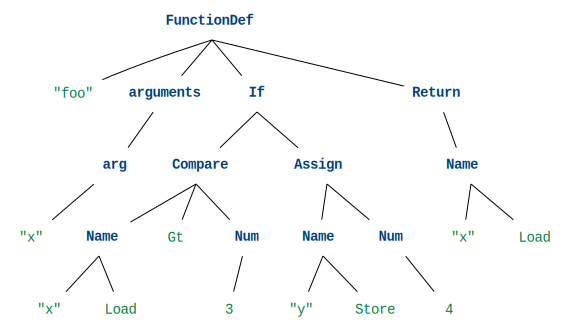

In [126]:
%%showast
def foo(x):
    if x > 3:
        y = 4
    return x

In [122]:
def foo(x):
    x = 4
    y = 7
    (x,y) = 7,3
    return x

In [162]:
class InterpExpr(ast.NodeVisitor):
    def visit_Compare(self,node):
        if isinstance(node.ops[0], Gt):
            pass
        return
    def visit_Name(self,node):
        return Int(node.id)
    
def interp_expr(e):
    print(e)
    if isinstance(e,ast.Compare):
        if isinstance(e.ops[0], Gt):
            return interp_expr(e.left) > interp_exp(e.comparators[0])
    if isinstance(e, ast.Name):
        return Int(e.id)
    if isinstance(e, ast.Constant):
        return e.value
    if isinstance(e, ast.Num):
        return IntVal(e.n)

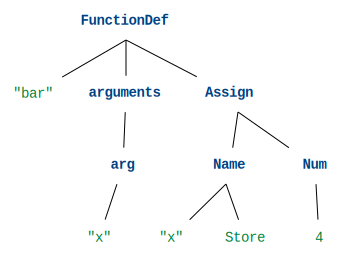

In [163]:
%%showast
def bar(x):
    x = 4

In [165]:

x = Int("x")
class Visty3(ast.NodeVisitor):
    def __init__(self, post):
        self.wp = post
    def generic_visit(self,node):
        #print(node)
        ast.NodeVisitor.generic_visit(self,node)
        return self.wp #st.NodeVisitor.generic_visit(self,node))
    def visit_FunctionDef(self,node):
        for stmt in reversed(node.body):
            #print(stmt)
            ast.NodeVisitor.visit(self,stmt)
    def visit_Assign(self,node):
        print("fuzby")
        lhs = node.targets[0]
        print(interp_expr(node.value))
        self.wp = substitute(self.wp, (Int(lhs.id), interp_expr(node.value)))

def bar(x):
    x = 4


        
Visty3(x >= 4).visit(reflect(bar))
# alternatively, we could trasnform all assignments and if then elses into something overloadable.

fuzby
4


4 >= 4

In [124]:
class Visty(ast.NodeVisitor):
    def visit_FunctionDef(self,node):
        print(node.name)

Visty().visit(reflect(foo))
        
class Visty2(ast.NodeVisitor):
    def generic_visit(self,node):
        print(type(node))
        ast.NodeVisitor.generic_visit(self,node)
Visty2().visit(reflect(foo))   

class Visty3(ast.NodeVisitor):
    def __init__(self):
        self.acc = 0
    def generic_visit(self,node):
        print(node)
        ast.NodeVisitor.generic_visit(self,node)
        return self.acc #st.NodeVisitor.generic_visit(self,node))
    def visit_Name(self,node):
        print(node)
        self.acc += 1
        #ast.NodeVisitor.generic_visit(self,node)
'''        return 1
    def visit_Num(self,node):
        return 0
    def visit_Store(self,node):
        return 0
    def visit_arg(self,node):
        return 0
    def visit_arguments(self,node):
        return 0
    def visit_Return(self,node):
        return 0
        '''
    
Visty3().visit(reflect(foo))

class Visty4(ast.NodeVisitor):
    def generic_visit(self,node):
        print(node)
        ast.NodeVisitor.generic_visit(self,node)
        return self.acc #st.NodeVisitor.generic_visit(self,node))
    def visit_Name(self,node):
        return 1
        #ast.NodeVisitor.generic_visit(self,node)

foo
<class '_ast.Module'>
<class '_ast.FunctionDef'>
<class '_ast.arguments'>
<class '_ast.arg'>
<class '_ast.Assign'>
<class '_ast.Name'>
<class '_ast.Store'>
<class '_ast.Num'>
<class '_ast.Assign'>
<class '_ast.Name'>
<class '_ast.Store'>
<class '_ast.Num'>
<class '_ast.Assign'>
<class '_ast.Tuple'>
<class '_ast.Name'>
<class '_ast.Store'>
<class '_ast.Name'>
<class '_ast.Store'>
<class '_ast.Store'>
<class '_ast.Tuple'>
<class '_ast.Num'>
<class '_ast.Num'>
<class '_ast.Load'>
<class '_ast.Return'>
<class '_ast.Name'>
<class '_ast.Load'>


5

In [108]:
sum(0)

TypeError: 'int' object is not iterable

Joesette - Rosette bnut for julai

So what is the specturm?
Strongest Postcondition
Weakest precondition
Hoare style axiom schema
Model Checking - TLA+ - every program counter replicates variables
SSA style model checking

https://homes.cs.washington.edu/~emina/media/cav19-tutorial/part2.pdf
symbolic execution vs bounded model checking
You could actually explore all paths in the program and hand them off as a conjunction to z3.
It's a choice of where the search happens

"
Control flow atumatoa
vertices are entriues and exits of basic blocks. Joins and branches


The is the CFG, which is small. Printable on your screen
But there is also CFG x Statespace ~ Statespace if your consider the program counter to be part of the state
This is very very large. Rdiciulously so
Edges if execution path between  (x = 0, y = 2) - (x := x + 1) ----->  (x = 1, y = 2)

Start with CFG/CFA. is error node even connected? Yes, probably. Ok. Let's refine the CFG to include some state
Take a path that goes to error node.
Take wp of this path. If SAT, done. Model is execution trace that reaches error node.
If UNSAT, CFG is failing to capture something
Take WP of each branch point starting from the top.
Get the first UNSAT branch point
Propagate this branching condition up using WP to each intermediate node.
Split along path on this property. Each node along path splits into 2, true prop and false prop. Determine refined edges to/from these nodes using local smt query.

rinse repeat.
"






In [79]:
import showast

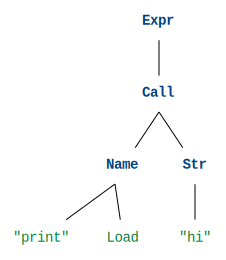

In [80]:
%%showast
print("hi")

In [6]:
IntSeq = SeqSort(IntSort())
# https://theory.stanford.edu/~nikolaj/programmingz3.html#sec-sequences-and-strings

# Unit, Select, Length, Empty, Concat, Nth, indexof,  #https://rise4fun.com/z3/tutorial/sequences
#Unit(IntSeq)
dir(Empty(IntSeq))
a = Const("a", IntSeq)
a + a
Concat(a,a)
dir(a)
solve(Length(a) == 2, a[0] == 4)
#Unit(IntSeq) # crashing?

# Or one can make a list
#List(IntSort())

List = Datatype("MyList")
List.declare("Nil")
List.declare("Cons", ("hd", IntSort()), ("tail", List))
List = List.create()

[a = Concat(Unit(4), Unit(5))]


In [21]:
# would it be better to turn x into a function of time step
#x_fun = Function(str(x), IntSort(), x.sort())
#always = Function("[]", BoolSort(), BoolSort() )
# I can't subsitute always though can i

#diff(x)
def eventually(p, n=20):
    return Not(always(Not(p),n=n))

init = x == 0
nxt = Or(prime(x) == x + 1, prime(x) == x)
spec = init & always(nxt, n = 5)

prove(Implies(spec,  eventually(x > 2, n = 5) ))
#Implies(spec,  eventually(x > 2, n = 4) )


counterexample
[x_2 = 1, x_4 = 2, x_1 = 0, x_3 = 1, x = 0]


In [55]:
def diff(x):
    #diff = Function("diff", RealSort(), RealSort())
    if x.decl().name() == "+":
        (a,b) = x.children()
        return diff(a) + diff(b)
    elif x.decl().name() == "*": 
        (a,b) = x.children()
        return diff(a) * b + a * diff(b)
    elif x.decl().name() == "/": 
        (a,b) = x.children()
        return diff(a) * b + a * diff(b)
    elif is_const(x): 
          if x.decl().kind() == Z3_OP_UNINTERPRETED:
                return Function("diff", RealSort(), RealSort())(x)
          else:
                return 0
    elif is_real(x):
        return 0
simplify(diff(x*y*y*3 + 8 * x))

3*y*(y*diff(x) + x*diff(y)) + 3*x*y*diff(y) + 8*diff(x)

In [59]:
is_const(f(x))
is_real(f(x))
dir(f(x))

['__add__',
 '__bool__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_repr_html_',
 'arg',
 'as_ast',
 'ast',
 'children',
 'ctx',
 'ctx_ref',
 'decl',
 'eq',
 'get_id',
 'hash',
 'is_int',
 'is_real',
 'num_args',
 'params',
 'sexpr',
 'sort',
 'sort_kind',
 'translate',
 'use_pp']

In [40]:
x, y = Reals("x y")
dir(x + y)
(x / y).decl().name() == "/" 

True

In [39]:
(x * y * y).children()
f = Function("f", RealSort(), RealSort())
is_const(f(x))

False

In [48]:
is_real((3*x).children()[0])

True

In [35]:
dir(x)

['__add__',
 '__bool__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_repr_html_',
 'arg',
 'as_ast',
 'ast',
 'children',
 'ctx',
 'ctx_ref',
 'decl',
 'eq',
 'get_id',
 'hash',
 'is_int',
 'is_real',
 'num_args',
 'params',
 'sexpr',
 'sort',
 'sort_kind',
 'translate',
 'use_pp']

In [ ]:
#FIFO



Can i do platzers differnetial thingo?
with uh gordon's thing?


In [ ]:
def match(x,t,S):
    

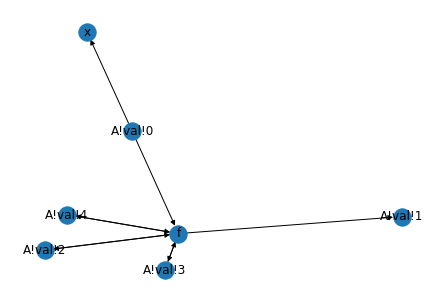

In [123]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
for d in m.decls():
    if d.arity() > 0:
        fmodel = m[d].as_list()
        for entry in fmodel[:-1]:
            G.add_edge(entry[-1], f)
            for invar in entry[:-1]:
                G.add_edge(f,invar)
        for 
    else:
        G.add_edge(m[d], d)
nx.draw(G, with_labels=True)

In [148]:
m[f]

[A!val!1 -> A!val!2,
 A!val!2 -> A!val!3,
 A!val!3 -> A!val!4,
 A!val!4 -> A!val!0,
 else -> A!val!1]

In [147]:
from itertools import product
list(product(*[ m[f.domain(narg)] for narg in range(f.arity())  ]))

[(A!val!4,), (A!val!1,), (A!val!3,), (A!val!0,), (A!val!2,)]

In [111]:
list(match_top(m, [x], f(f(f(x)))))

[{x: A!val!1}, {x: A!val!2}]

In [100]:
def myeg():
    yield 1

for i in myeg():
    print(i)

1


In [97]:
A    = DeclareSort('A')
x, y = Consts('x y', A)
f    = Function('f', A, A)
dir(f(x))
f(x).children()

[x]

unfortunately, if we have to do the matching ourselves, it feels like we aren't getting much out of z3.
Well, we're getting an egraph.



In [98]:
dir(m)
m.decls()
print(type(m[f]))
print(m[x])
type(m[x])
print(dir(m[f]))
print(m[f].as_list())


<class 'z3.z3.FuncInterp'>
A!val!0
['__class__', '__copy__', '__deepcopy__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_repr_html_', 'arity', 'as_list', 'ctx', 'else_value', 'entry', 'f', 'num_entries', 'translate', 'use_pp']
[[A!val!1, A!val!2], [A!val!2, A!val!3], [A!val!3, A!val!4], [A!val!4, A!val!0], A!val!1]


I could reconstruct the graph, find patterns, instantiate them. That's a little ridiculous though

The values in the model ~ equivalence classes of terms.
We can build a reversal map



unsat cores. Could i use this to find instantiations?

refiy9ing into networkx



